<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [1]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy
from spacy.tokenizer import Tokenizer
from bs4 import BeautifulSoup

## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read through the documentation to accomplish this task. 

In [2]:
from bs4 import BeautifulSoup
import requests

##### Your Code Here #####
filepath = 'job_listings.csv'
df = pd.read_csv(filepath).drop('Unnamed: 0', axis=1)
df.head()

,description,title
0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level
3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist
4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist


In [3]:
df['bs_text'] = [BeautifulSoup(text).get_text() for text in df['description']]
df['bs_text'][0]

'b"Job Requirements:\\nConceptual understanding in Machine Learning models like Nai\\xc2\\xa8ve Bayes, K-Means, SVM, Apriori, Linear/ Logistic Regression, Neural, Random Forests, Decision Trees, K-NN along with hands-on experience in at least 2 of them\\nIntermediate to expert level coding skills in Python/R. (Ability to write functions, clean and efficient data manipulation are mandatory for this role)\\nExposure to packages like NumPy, SciPy, Pandas, Matplotlib etc in Python or GGPlot2, dplyr, tidyR in R\\nAbility to communicate Model findings to both Technical and Non-Technical stake holders\\nHands on experience in SQL/Hive or similar programming language\\nMust show past work via GitHub, Kaggle or any other published article\\nMaster\'s degree in Statistics/Mathematics/Computer Science or any other quant specific field.\\nApply Now"'

In [4]:
def clean_description(description):
    '''
    This function removes HTML characters from text data and removed the empty strings that replaced them
    '''
    compiled = re.compile('<.*?>')
    subbed = re.sub(compiled, '', description)
    return subbed

In [5]:
df['bs_text'] = df['bs_text'].apply(clean_description)
df

,description,title,bs_text
0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist,"b""Job Requirements:\nConceptual understanding ..."
1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I,"b'Job Description\n\nAs a Data Scientist 1, yo..."
2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level,b'As a Data Scientist you will be working on c...
3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist,"b'$4,969 - $6,756 a monthContractUnder the gen..."
4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist,b'Location: USA \xe2\x80\x93 multiple location...
...,...,...,...
421,"b""<b>About Us:</b><br/>\nWant to be part of a ...",Senior Data Science Engineer,"b""About Us:\nWant to be part of a fantastic an..."
422,"b'<div class=""jobsearch-JobMetadataHeader icl-...",2019 PhD Data Scientist Internship - Forecasti...,"b'InternshipAt Uber, we ignite opportunity by ..."
423,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist - Insurance,"b'$200,000 - $350,000 a yearA million people a..."
424,"b""<p></p><div><p>SENIOR DATA SCIENTIST</p><p>\...",Senior Data Scientist,"b""SENIOR DATA SCIENTIST\nJOB DESCRIPTION\n\nAB..."


In [6]:
df['bs_text'] = df['bs_text'].replace(r'.\\n', ' ', regex=True)

In [7]:
df['bs_text'] = df['bs_text'].replace(r'.\\xe2\\x80\\x99', "'", regex=True)

In [8]:
df['bs_text'] = df['bs_text'].replace(r'.\\xe2\\x80\\xa', "", regex=True)

In [9]:
df

,description,title,bs_text
0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist,"b""Job Requirements Conceptual understanding in..."
1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I,"b'Job Descriptio \nAs a Data Scientist 1, you ..."
2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level,b'As a Data Scientist you will be working on c...
3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist,"b'$4,969 - $6,756 a monthContractUnder the gen..."
4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist,b'Location: USA \xe2\x80\x93 multiple location...
...,...,...,...
421,"b""<b>About Us:</b><br/>\nWant to be part of a ...",Senior Data Science Engineer,"b""About Us Want to be part of a fantastic and ..."
422,"b'<div class=""jobsearch-JobMetadataHeader icl-...",2019 PhD Data Scientist Internship - Forecasti...,"b'InternshipAt Uber, we ignite opportunity by ..."
423,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist - Insurance,"b'$200,000 - $350,000 a yearA million people a..."
424,"b""<p></p><div><p>SENIOR DATA SCIENTIST</p><p>\...",Senior Data Scientist,"b""SENIOR DATA SCIENTIS JOB DESCRIPTIO \nABOUT ..."


In [10]:
import re

def tokenize(text):
    
    regex_remove_non_alphanumeric = '[^a-zA-Z ]'
    replace_with = ""
    
    clean_text = re.sub(regex_remove_non_alphanumeric, replace_with, text)
    
    # So I had to use strip to remove whitespace from both the BEGINNING & END of a string. 
    # Had to do it here, before the split(" ") as this can't be performed on a list.
    stripped_text = clean_text.strip("  ")
    
    tokens = stripped_text.lower()
    
    return tokens

In [11]:
df['bs_text'] = df['bs_text'].apply(tokenize)

In [12]:
df

,description,title,bs_text
0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist,bjob requirements conceptual understanding in ...
1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I,bjob descriptio nas a data scientist you will...
2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level,bas a data scientist you will be working on co...
3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist,b a monthcontractunder the general supervisi...
4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist,blocation usa xexx multiple location years of...
...,...,...,...
421,"b""<b>About Us:</b><br/>\nWant to be part of a ...",Senior Data Science Engineer,babout us want to be part of a fantastic and f...
422,"b'<div class=""jobsearch-JobMetadataHeader icl-...",2019 PhD Data Scientist Internship - Forecasti...,binternshipat uber we ignite opportunity by se...
423,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist - Insurance,b a yeara million people a year die in car c...
424,"b""<p></p><div><p>SENIOR DATA SCIENTIST</p><p>\...",Senior Data Scientist,bsenior data scientis job descriptio nabout u ...


## 2) Use Spacy to tokenize the listings 

In [13]:
##### Your Code Here #####
nlp = spacy.load("en_core_web_lg")

In [33]:
def get_lemmas(text):

    lemmas = []
    
    doc = nlp(text)
    
    for token in doc: 
        if ((token.is_stop == False) and (token.is_punct == False) and (token.is_space == False)):
            lemmas.append(token.lemma_)
    
    return lemmas

In [34]:
df['lemmas'] = df['bs_text'].apply(get_lemmas)
df

,description,title,bs_text,lemmas,comprehended,tokens_list,tokens
0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist,bjob requirements conceptual understanding in ...,"[bjob, requirement, conceptual, understanding,...","[bjob, requirement, conceptual, understanding,...","[requirement, conceptual, understanding, machi...",requirement conceptual understanding machine l...
1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I,bjob descriptio nas a data scientist you will...,"[bjob, descriptio, na, data, scientist, help, ...","[bjob, descriptio, na, data, scientist, , hel...","[descriptio, na, scientist, , help, build, m...",descriptio na scientist help build machine ...
2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level,bas a data scientist you will be working on co...,"[bas, data, scientist, work, consult, business...","[bas, data, scientist, work, consult, business...","[bas, scientist, work, consult, business, resp...",bas scientist work consult business responsibl...
3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist,b a monthcontractunder the general supervisi...,"[b, monthcontractunder, general, supervision, ...","[b, , monthcontractunder, general, supervisi...","[b, , monthcontractunder, general, supervis...",b monthcontractunder general supervision p...
4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist,blocation usa xexx multiple location years of...,"[blocation, usa, xexx, multiple, location, yea...","[blocation, usa, xexx, multiple, location, , ...","[blocation, usa, xexx, multiple, location, ,...",blocation usa xexx multiple location year a...
...,...,...,...,...,...,...,...
421,"b""<b>About Us:</b><br/>\nWant to be part of a ...",Senior Data Science Engineer,babout us want to be part of a fantastic and f...,"[babout, want, fantastic, fun, startup, tha, r...","[babout, want, fantastic, fun, startup, tha, r...","[babout, want, fantastic, fun, startup, tha, r...",babout want fantastic fun startup tha revoluti...
422,"b'<div class=""jobsearch-JobMetadataHeader icl-...",2019 PhD Data Scientist Internship - Forecasti...,binternshipat uber we ignite opportunity by se...,"[binternshipat, uber, ignite, opportunity, set...","[binternshipat, uber, ignite, opportunity, set...","[binternshipat, uber, ignite, opportunity, set...",binternshipat uber ignite opportunity set worl...
423,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist - Insurance,b a yeara million people a year die in car c...,"[b, yeara, million, people, year, die, car, co...","[b, , yeara, million, people, year, die, car...","[b, , yeara, million, people, year, die, ca...",b yeara million people year die car collis...
424,"b""<p></p><div><p>SENIOR DATA SCIENTIST</p><p>\...",Senior Data Scientist,bsenior data scientis job descriptio nabout u ...,"[bsenior, datum, scientis, job, descriptio, na...","[bsenior, datum, scientis, job, descriptio, na...","[bsenior, datum, scientis, descriptio, nabout,...",bsenior datum scientis descriptio nabout u nam...


In [35]:
STOP_WORDS = nlp.Defaults.stop_words.union(['bjob', 'requirements', 'data', 'scientists', "job", "you\'ll", "x80", "x93", "xe2", 	"you\'re", "\ntoday" ])

In [36]:
tokenizer = Tokenizer(nlp.vocab)

In [37]:
def listintostring(string):
    '''
    This function converts lists into strings
    '''
    str = " "
    return (str.join(string))

In [38]:
df['comprehended'] = [x for x in df['lemmas'] if x]

In [39]:
df['lemmas'] = df['comprehended'].apply(listintostring)

In [40]:
tokens = []

for doc in tokenizer.pipe(df['lemmas']):

    doc_tokens =[]

    for token in doc:
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())
    tokens.append(doc_tokens)
    
df['tokens_list'] = tokens

In [41]:
df['tokens_list']

0      [requirement, conceptual, understanding, machi...
1      [descriptio, na, scientist, help, build, machi...
2      [bas, scientist, work, consult, business, resp...
3      [b, monthcontractunder, general, supervision, ...
4      [blocation, usa, xexx, multiple, location, yea...
                             ...                        
421    [babout, want, fantastic, fun, startup, tha, r...
422    [binternshipat, uber, ignite, opportunity, set...
423    [b, yeara, million, people, year, die, car, co...
424    [bsenior, datum, scientis, descriptio, nabout,...
425    [bcerner, intelligence, new, innovative, organ...
Name: tokens_list, Length: 426, dtype: object

In [42]:
# My tokens were in the form of a list, that's why I kept getting the error: list object has no attribute lower
# Have to un-nest everything from that list by converting it into a string
df['tokens'] = df['tokens_list'].apply(listintostring)

In [43]:
df['tokens']

0      requirement conceptual understanding machine l...
1      descriptio na scientist help build machine lea...
2      bas scientist work consult business responsibl...
3      b monthcontractunder general supervision profe...
4      blocation usa xexx multiple location year anal...
                             ...                        
421    babout want fantastic fun startup tha revoluti...
422    binternshipat uber ignite opportunity set worl...
423    b yeara million people year die car collision ...
424    bsenior datum scientis descriptio nabout u nam...
425    bcerner intelligence new innovative organizati...
Name: tokens, Length: 426, dtype: object

## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [44]:
##### Your Code Here #####
vect = CountVectorizer(
                       stop_words='english',
                       max_df=.85,
                       min_df=.15,
                       )

In [45]:
dtm = vect.fit_transform(df['tokens'])

In [46]:
dtm = pd.DataFrame(dtm.toarray(), columns=vect.get_feature_names())

In [47]:
dtm

,ability,able,achieve,action,actionable,address,advanced,age,algorithm,analysis,...,verbal,veteran,vision,visualization,want,way,world,write,xexx,year
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,2,1,2,0,1
2,1,0,0,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,2,0,0,0,0,0,0,1,0,0,...,0,1,0,0,2,1,0,0,0,4
422,0,0,0,0,0,1,0,0,1,1,...,0,0,0,0,0,0,3,1,0,0
423,0,0,0,1,0,0,2,1,0,0,...,0,1,2,0,1,0,2,1,0,1
424,0,2,0,0,1,0,0,1,0,2,...,0,1,0,0,1,0,0,0,0,1


## 4) Visualize the most common word counts

In [62]:
from collections import Counter

def count(tokens):
    
    word_counts = Counter()
    
    appears_in = Counter()

    total_docs = len(tokens)

    for token in tokens: 
        word_counts.update(token)
        appears_in.update(set(token))

    temp = zip(word_counts.keys(), word_counts.values())
    wc = pd.DataFrame(temp, columns = ['word', 'count'])

    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()

    wc['pct_total'] = wc['count'].apply(lambda token_count: token_count / total * 100)
 
    wc = wc.sort_values(by='rank')
    wc['cul_pct_total'] = wc['pct_total'].cumsum()

    t2 = zip(appears_in.keys(), appears_in.values())
    ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
    
    wc = ac.merge(wc, on='word')

    wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs * 100)

    return wc.sort_values(by='rank')

In [63]:
wc = count(df['tokens_list'])

In [64]:
wc

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
175,datum,410,2854,1.0,2.206929,2.206929,96.244131
60,experience,402,1768,2.0,1.367151,3.574080,94.366197
41,work,380,1604,3.0,1.240334,4.814414,89.201878
300,team,369,1302,4.0,1.006805,5.821219,86.619718
84,business,323,1202,5.0,0.929477,6.750696,75.821596
...,...,...,...,...,...,...,...
9020,obligate,1,1,9020.0,0.000773,99.996907,0.234742
9017,immunization,1,1,9021.0,0.000773,99.997680,0.234742
9010,flu,1,1,9022.0,0.000773,99.998453,0.234742
9012,domesticregiona,1,1,9023.0,0.000773,99.999227,0.234742


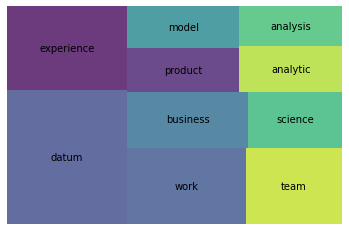

In [65]:
##### Your Code Here #####
import squarify
import matplotlib.pyplot as plt

wc_top = wc[wc['rank'] <= 10]

squarify.plot(sizes=wc_top['pct_total'], label=wc_top['word'], alpha=.8)
plt.axis('off')
plt.show()

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [66]:
##### Your Code Here #####
vect2 = TfidfVectorizer(
                        stop_words='english', 
                        ngram_range=(1,2),
                        max_df=.85,
                        min_df=.15,
                        )

In [67]:
dtm_tfidf = vect2.fit_transform(df['tokens'])

In [69]:
dtm_tfidf = pd.DataFrame(dtm_tfidf.todense(), columns=vect2.get_feature_names())
dtm_tfidf

,ability,able,achieve,action,actionable,address,advanced,age,algorithm,analysis,...,veteran status,vision,visualization,want,way,world,write,xexx,year,year experience
0,0.258311,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.170800,0.000000,0.000000,0.000000
1,0.041869,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.052498,0.037272,...,0.000000,0.000000,0.0,0.000000,0.121305,0.054666,0.110737,0.000000,0.035839,0.000000
2,0.102666,0.000000,0.000000,0.000000,0.177318,0.000000,0.127177,0.000000,0.128731,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.123252,0.000000,0.000000,0.000000,0.110120,0.000000,0.000000,...,0.107146,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.331848,0.165217,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,0.070366,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.055570,0.000000,0.000000,...,0.054070,0.000000,0.0,0.128726,0.050968,0.000000,0.000000,0.000000,0.120465,0.098109
422,0.000000,0.000000,0.000000,0.000000,0.000000,0.118497,0.000000,0.000000,0.079151,0.056195,...,0.000000,0.000000,0.0,0.000000,0.000000,0.247256,0.083478,0.000000,0.000000,0.000000
423,0.000000,0.000000,0.000000,0.104797,0.000000,0.000000,0.146866,0.093631,0.000000,0.000000,...,0.091103,0.212638,0.0,0.108446,0.000000,0.154799,0.078395,0.000000,0.050743,0.000000
424,0.000000,0.135702,0.000000,0.000000,0.071812,0.000000,0.000000,0.065672,0.000000,0.074029,...,0.063899,0.000000,0.0,0.076063,0.000000,0.000000,0.000000,0.000000,0.035591,0.057972


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [70]:
##### Your Code Here #####
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(n_neighbors=7, algorithm='ball_tree')
nn.fit(dtm_tfidf)

NearestNeighbors(algorithm='ball_tree', n_neighbors=7)

In [71]:
# sample a doc from dtm to use as our query point
doc_index = 0
# using integer location(iloc) on the document index in order to sample them
doc = [dtm_tfidf.iloc[doc_index].values]

# Query Using kneighbors 
neigh_dist, neigh_index = nn.kneighbors(doc)

In [72]:
# distance scores for top 5 most sim articles 
# notice that the first 2 distance scores are zero,
# this is because they are actually duplicates of the query doc,
# so we want to recommend the 3rd closest article
neigh_dist

array([[0.        , 1.14318118, 1.16052571, 1.16052571, 1.16549462,
        1.16930108, 1.17538176]])

In [73]:
# notice that the same article from the cosine example, index 309, is recommended as the most similar doc 
neigh_index

array([[  0, 224, 166, 335, 336, 313, 325]])

In [74]:
# My ideal job description
ideal_job_desc = ["Ideal candidate is well versed in both programming and philosophical wit. Can create toy ML models that refute famous thought experiments."]

In [76]:
# Transforming my ideal job description with tfidfvectorizer
desc = vect2.transform(ideal_job_desc)

In [85]:
# Fitting knn to ideal job description 
nn.kneighbors(desc.todense())

ValueError: Expected n_neighbors <= n_samples,  but n_samples = 1, n_neighbors = 7

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 